# Predict if the Merchant is Fraudster or not for an e-commerce client

**Problem Statement**: 'XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such schemes leave customers duped, and place both legitimate merchants and the company itself in a constant battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud investigation. It's a well-known problem both to the company and to merchants, which they say hasn't effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent merchants using technology.

You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no) based on the quantitative and qualitative features provided in the dataset while answering other questions too cited below.

**Datasets provided:**

1.Train:
- train_merchant_data.csv: Merchant Information.
- train_order_data.csv: Order Information.
- train.csv: Target Label Information.

2.Test:
- test_merchant_data.csv: Merchant Information.
- test_order_data.csv: Order Information.
- test.csv: Target is not available as it is to be predicted.

**All Attributes names are self-explanatory.**

**Evaluation Metric**: Consider ‘F1-score’ of the fraudulent class as the error metric for classification task to tune the model and for submissions in the tool.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from scipy.stats import skew, norm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)  
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Reading datasets

In [3]:
train1=pd.read_csv('train_merchant_data.csv')
train2=pd.read_csv('train_order_data.csv')
train3=pd.read_csv('train.csv')

test1=pd.read_csv('test_merchant_data.csv')
test2=pd.read_csv('test_order_data.csv')
test3=pd.read_csv('test.csv')

submission=pd.read_csv('samplesubmission.csv')

In [4]:
train1

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172
...,...,...,...,...,...,...,...
54208,1746213,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31
54209,1746213,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122
54210,1746213,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217
54211,1746213,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178


In [5]:
train2

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146
...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466


In [6]:
train3

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1
...,...,...
54208,243300,0
54209,219957,0
54210,101017,0
54211,50557,0


We will now **merge** above datasets in one **single dataframe** on **Merchant_ID** attribute.

In [8]:
train=pd.merge(train1,train2,on='Merchant_ID')
train

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,1746213,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31,111700,58d25819870c,2018-06-12 17:18:37,108,Ads,E-wallet
54209,1746213,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122,122148,569444812870,2018-09-17 08:49:53,130,Ads,Debit Card
54210,1746213,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217,125450,902290f02e47,2018-04-10 04:20:07,42,Direct,Debit Card
54211,1746213,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178,115567,f465038328e7,2018-06-21 03:35:43,82,Ads,Debit Card


In [9]:
train=pd.merge(train,train3,on='Merchant_ID')
train

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,1746213,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31,111700,58d25819870c,2018-06-12 17:18:37,108,Ads,E-wallet,0
54209,1746213,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122,122148,569444812870,2018-09-17 08:49:53,130,Ads,Debit Card,1
54210,1746213,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217,125450,902290f02e47,2018-04-10 04:20:07,42,Direct,Debit Card,0
54211,1746213,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178,115567,f465038328e7,2018-06-21 03:35:43,82,Ads,Debit Card,0


Similarly, will merge **Test dataset**

In [10]:
test=pd.merge(test1,test2,on='Merchant_ID')
test

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,1746213,279884,2018-04-21 03:10:18,JNYAWEFRSBGCK,M,20,164.83.157.213,153457,f0caea3c0bbb,2018-06-25 23:00:41,92,SEO,Credit Card
13550,1746213,206253,2018-06-10 11:16:31,HYEKCYQYSPVIO,F,30,40.46.42.142,139271,a23964a17f12,2018-07-14 19:20:44,128,SEO,Internet Banking
13551,1746213,313049,2018-02-27 00:55:48,OVSRMAXBANHKT,F,44,210.44.212.84,156228,28e0b6aa4aca,2018-03-05 12:08:52,98,Direct,E-wallet
13552,1746213,304081,2018-05-20 12:17:43,STSCTKTROPBTH,F,39,46.244.39.59,160078,3e1d365937d6,2018-05-22 18:30:43,68,SEO,Debit Card


In [11]:
test=pd.merge(test,test3,on='Merchant_ID')
test

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,1746213,279884,2018-04-21 03:10:18,JNYAWEFRSBGCK,M,20,164.83.157.213,153457,f0caea3c0bbb,2018-06-25 23:00:41,92,SEO,Credit Card
13550,1746213,206253,2018-06-10 11:16:31,HYEKCYQYSPVIO,F,30,40.46.42.142,139271,a23964a17f12,2018-07-14 19:20:44,128,SEO,Internet Banking
13551,1746213,313049,2018-02-27 00:55:48,OVSRMAXBANHKT,F,44,210.44.212.84,156228,28e0b6aa4aca,2018-03-05 12:08:52,98,Direct,E-wallet
13552,1746213,304081,2018-05-20 12:17:43,STSCTKTROPBTH,F,39,46.244.39.59,160078,3e1d365937d6,2018-05-22 18:30:43,68,SEO,Debit Card


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       54213 non-null  int64 
 1   Merchant_ID                 54213 non-null  int64 
 2   Merchant_Registration_Date  54213 non-null  object
 3   Registered_Device_ID        54213 non-null  object
 4   Gender                      54213 non-null  object
 5   Age                         54213 non-null  int64 
 6   IP_Address                  54213 non-null  object
 7   Customer_ID                 54213 non-null  int64 
 8   Order_ID                    54213 non-null  object
 9   Date_of_Order               54213 non-null  object
 10  Order_Value_USD             54213 non-null  int64 
 11  Order_Source                54213 non-null  object
 12  Order_Payment_Method        54213 non-null  object
 13  Fraudster                   54213 non-null  in

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       13554 non-null  int64 
 1   Merchant_ID                 13554 non-null  int64 
 2   Merchant_Registration_Date  13554 non-null  object
 3   Registered_Device_ID        13554 non-null  object
 4   Gender                      13554 non-null  object
 5   Age                         13554 non-null  int64 
 6   IP_Address                  13554 non-null  object
 7   Customer_ID                 13554 non-null  int64 
 8   Order_ID                    13554 non-null  object
 9   Date_of_Order               13554 non-null  object
 10  Order_Value_USD             13554 non-null  int64 
 11  Order_Source                13554 non-null  object
 12  Order_Payment_Method        13554 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.4+ MB


In [19]:
print(train.shape, '\n')

print (train.nunique())


(54213, 14) 

Ecommerce_Provider_ID         1    
Merchant_ID                   54213
Merchant_Registration_Date    54213
Registered_Device_ID          51291
Gender                        2    
Age                           53   
IP_Address                    52028
Customer_ID                   34081
Order_ID                      54213
Date_of_Order                 54161
Order_Value_USD               116  
Order_Source                  3    
Order_Payment_Method          5    
Fraudster                     2    
dtype: int64


In [20]:
print(test.shape, '\n')

print (test.nunique())

(13554, 13) 

Ecommerce_Provider_ID         1    
Merchant_ID                   13554
Merchant_Registration_Date    13554
Registered_Device_ID          13213
Gender                        2    
Age                           51   
IP_Address                    13251
Customer_ID                   11975
Order_ID                      13554
Date_of_Order                 13548
Order_Value_USD               105  
Order_Source                  3    
Order_Payment_Method          5    
dtype: int64


The **levels** of categorical attributes in both **train and test** sets are **equal**. 

There are **no NaN values** in both sets as well.

## Feature engineering

First we will **seperate** **date** and **time** from both **Merchant_Registeration_Date** and **Date_of_Order** attributes.

On train set

In [21]:
d_t=train['Merchant_Registration_Date']
d,t=zip(*(s.split(" ") for s in d_t))
train['MRD_Date']=d
train['MRD_Time']=t
train.drop(['Merchant_Registration_Date'],axis=1,inplace=True)

In [22]:
d_t=train['Date_of_Order']
d,t=zip(*(s.split(" ") for s in d_t))
train['DO_Date']=d
train['DO_Time']=t
train.drop(['Date_of_Order'],axis=1,inplace=True)

on test set

In [23]:
d_t=test['Merchant_Registration_Date']
d,t=zip(*(s.split(" ") for s in d_t))
test['MRD_Date']=d
test['MRD_Time']=t
test.drop(['Merchant_Registration_Date'],axis=1,inplace=True)

In [24]:
d_t=test['Date_of_Order']
d,t=zip(*(s.split(" ") for s in d_t))
test['DO_Date']=d
test['DO_Time']=t
test.drop(['Date_of_Order'],axis=1,inplace=True)

In [25]:
train=train.drop(columns=['MRD_Time','DO_Time'])

test=test.drop(columns=['MRD_Time','DO_Time'])

After that we will use only month from both attributes because the data is of only one year i.e 2018.

In [27]:
train['MRD_Month']=pd.DatetimeIndex(train['MRD_Date']).month
train['DO_Month']=pd.DatetimeIndex(train['DO_Date']).month

In [28]:
test['MRD_Month']=pd.DatetimeIndex(test['MRD_Date']).month
test['DO_Month']=pd.DatetimeIndex(test['DO_Date']).month

In [29]:
train=train.drop(columns=['MRD_Date','DO_Date'])

test=test.drop(columns=['MRD_Date','DO_Date'])

## EDA

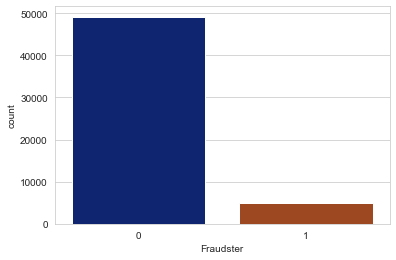

In [30]:
sns.countplot(x='Fraudster',data=train,palette='dark');

We can see the class is **Highly Imbalance**

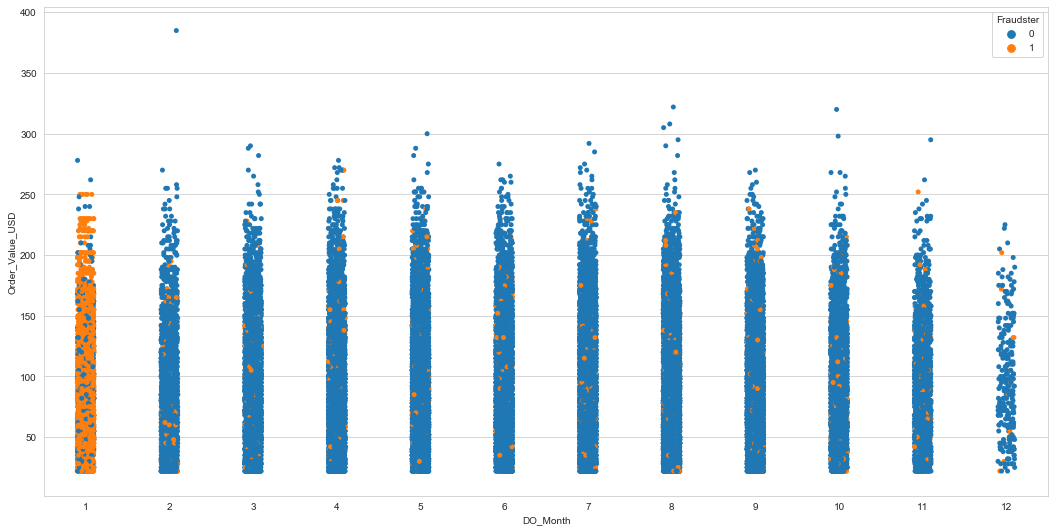

In [31]:
f,ax=plt.subplots(figsize=(18,9))
g=sns.stripplot(x='DO_Month',y='Order_Value_USD',hue='Fraudster',data=train);

Interesting thing here is, we have more no. of fraudulent cases in 1st month of Date of Order.

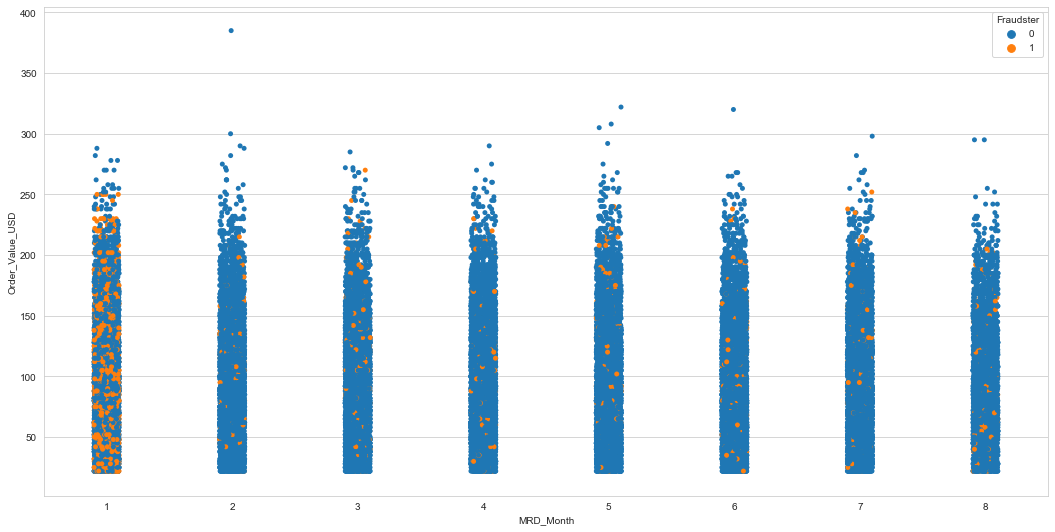

In [32]:
f,ax=plt.subplots(figsize=(18,9))
g=sns.stripplot(x='MRD_Month',y='Order_Value_USD',hue='Fraudster',data=train);

Similar observation is seen in Merchant_Registration_Date. Merchants who are registered in 1st month of year are more to be fraudster.

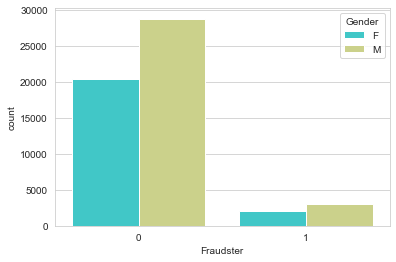

In [33]:
sns.countplot(x='Fraudster',hue='Gender',data=train,palette='rainbow');

The ratio of fraud in males and females is nearly equal.

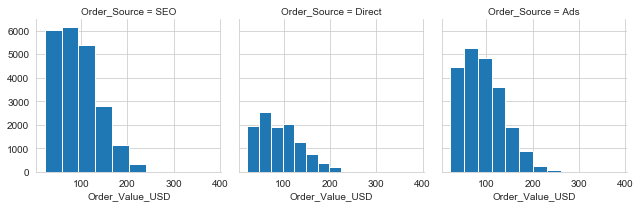

In [34]:
g=sns.FacetGrid(data=train,col='Order_Source',palette='bright');
g.map(plt.hist,'Order_Value_USD');

Frequency of SEO order source is highest, after that its Ads and the occurence of Direct order source is least if compared to the Order_Value_USD.

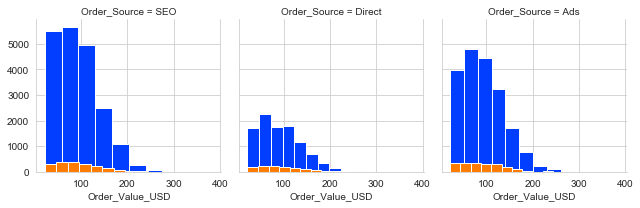

In [35]:
g=sns.FacetGrid(data=train,col='Order_Source',hue='Fraudster',palette='bright');
g.map(plt.hist,'Order_Value_USD');

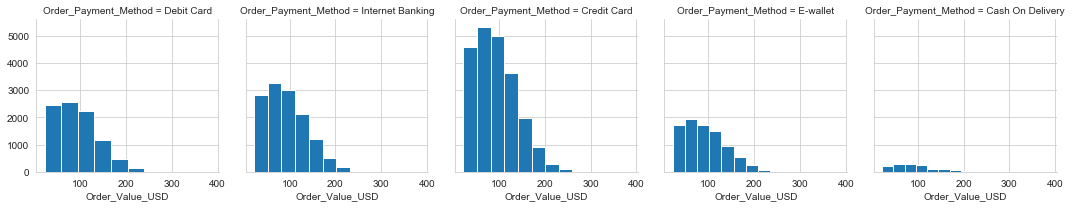

In [36]:
g=sns.FacetGrid(data=train,col='Order_Payment_Method');
g.map(plt.hist,'Order_Value_USD');

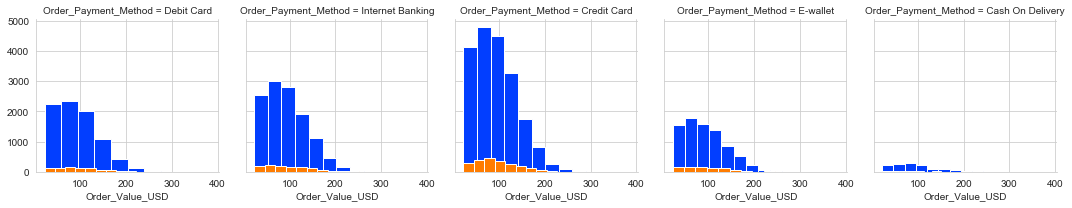

In [37]:
g=sns.FacetGrid(data=train,col='Order_Payment_Method',hue='Fraudster',palette='bright');
g.map(plt.hist,'Order_Value_USD');

We see more no. of frauds have noted in Credit Card method of payment while least are in Cash On Delivery

In [39]:
train.columns

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Registered_Device_ID',
       'Gender', 'Age', 'IP_Address', 'Customer_ID', 'Order_ID',
       'Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'MRD_Month', 'DO_Month'],
      dtype='object')

In [41]:
train = train.drop(['Ecommerce_Provider_ID','Merchant_ID','Registered_Device_ID','IP_Address','Customer_ID','Order_ID'], axis=1)

In [42]:
test = test.drop(['Ecommerce_Provider_ID','Merchant_ID','Registered_Device_ID','IP_Address','Customer_ID','Order_ID'], axis=1)

In [43]:
train.columns

Index(['Gender', 'Age', 'Order_Value_USD', 'Order_Source',
       'Order_Payment_Method', 'Fraudster', 'MRD_Month', 'DO_Month'],
      dtype='object')

In [44]:
cat_cols = ['Gender', 'Order_Source', 'Order_Payment_Method', 'MRD_Month', 'DO_Month']

## Train - validation split

In [45]:
train, valid = train_test_split(train, test_size = 0.3, random_state = 1234)

In [46]:
print("Shape of training set:", train.shape)
print("Shape of validation set:", valid.shape)
print("Shape of test_data set:", test.shape) 

Shape of training set: (37949, 8)
Shape of validation set: (16264, 8)
Shape of test_data set: (13554, 7)


In [47]:
X_train = train.drop('Fraudster', axis = 1)
y_train = train['Fraudster']

X_valid = valid.drop('Fraudster', axis = 1)
y_valid = valid['Fraudster']

In [48]:
X_train = pd.get_dummies(X_train, columns = cat_cols, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_cols, drop_first = True) 
test = pd.get_dummies(test, columns = cat_cols, drop_first = True) 

In [49]:
print(X_train.shape)

print(X_valid.shape)

print(test.shape)

(37949, 27)
(16264, 27)
(13554, 27)


In [50]:
X_train

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,MRD_Month_2,MRD_Month_3,MRD_Month_4,MRD_Month_5,MRD_Month_6,MRD_Month_7,MRD_Month_8,DO_Month_2,DO_Month_3,DO_Month_4,DO_Month_5,DO_Month_6,DO_Month_7,DO_Month_8,DO_Month_9,DO_Month_10,DO_Month_11,DO_Month_12
10785,36,112,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
29202,46,35,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
52456,20,42,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
19401,46,120,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
31521,37,138,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,48,78,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
17048,41,120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23924,26,135,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34086,41,35,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Feature Scaling

The Standard Scaler converts your data in a normally distributed way, each feature will be scaled such that the distribution is now centred around 0, with a standard deviation of 1

In [52]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)

## Model Building

### Logistic Regression

In [53]:
LR=LogisticRegression()

LR.fit(X_train,y_train)

y_pred_LR_train=LR.predict(X_train)
y_pred_LR_valid=LR.predict(X_valid)

cr_lr_train=classification_report(y_train,y_pred_LR_train)
cr_lr_valid=classification_report(y_valid,y_pred_LR_valid)

print('Train Classification Report')
print(cr_lr_train)

print('Validation Classification Report')
print(cr_lr_valid)

Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34419
           1       0.79      0.53      0.64      3530

    accuracy                           0.94     37949
   macro avg       0.87      0.76      0.80     37949
weighted avg       0.94      0.94      0.94     37949

Validation Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14769
           1       0.78      0.53      0.63      1495

    accuracy                           0.94     16264
   macro avg       0.87      0.76      0.80     16264
weighted avg       0.94      0.94      0.94     16264

